# Explore here

### Data Load

In [8]:
import pandas as pd

raw_data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

raw_data_df.info

<bound method DataFrame.info of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       

In [9]:
data_df=raw_data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
raw_data_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
data_df = raw_data_df[['MedInc', 'Latitude', 'Longitude']]

# Create train-test split
training_data, testing_data = train_test_split(data_df, test_size=0.20, random_state=42)

# Display the first few rows of the training and testing sets
print("Training Data:")
print(training_data.head())

print("\nTesting Data:")
print(testing_data.head())


Training Data:
       MedInc  Latitude  Longitude
14196  3.2596     32.71    -117.03
8267   3.8125     33.77    -118.16
17445  4.1563     34.66    -120.48
14265  1.9425     32.69    -117.11
2271   3.5542     36.78    -119.80

Testing Data:
       MedInc  Latitude  Longitude
20046  1.6812     36.06    -119.01
3024   2.5313     35.14    -119.46
15663  3.4801     37.80    -122.44
20484  5.7376     34.28    -118.72
9814   3.7250     36.62    -121.93


## EDA

### Missing Values

Missing values in each column:
MedInc       0
Latitude     0
Longitude    0
dtype: int64


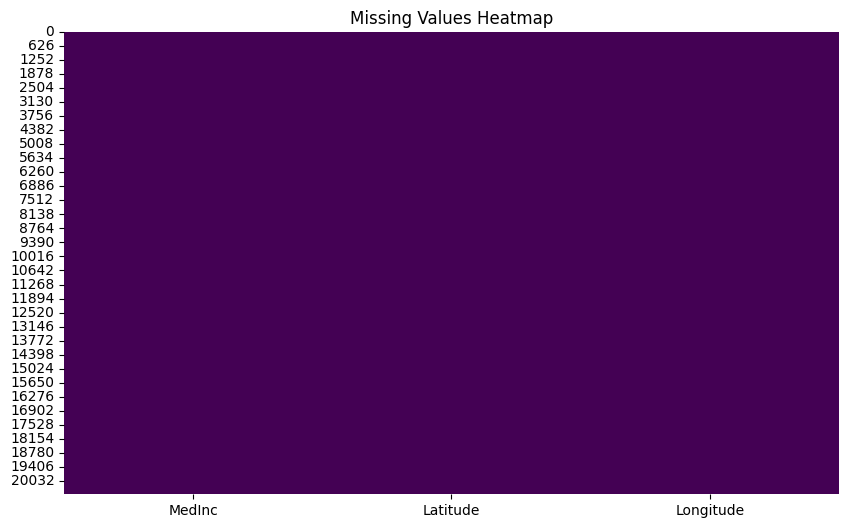

In [12]:
# Missing Values 

import pandas as pd

# Load the data
raw_data_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Select relevant columns
data_df = raw_data_df[['MedInc', 'Latitude', 'Longitude']]

# Check for missing values
missing_values = data_df.isnull().sum()

# Print out the missing values
print("Missing values in each column:")
print(missing_values)

# Missing values using a heatmap 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(data_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


Histograms

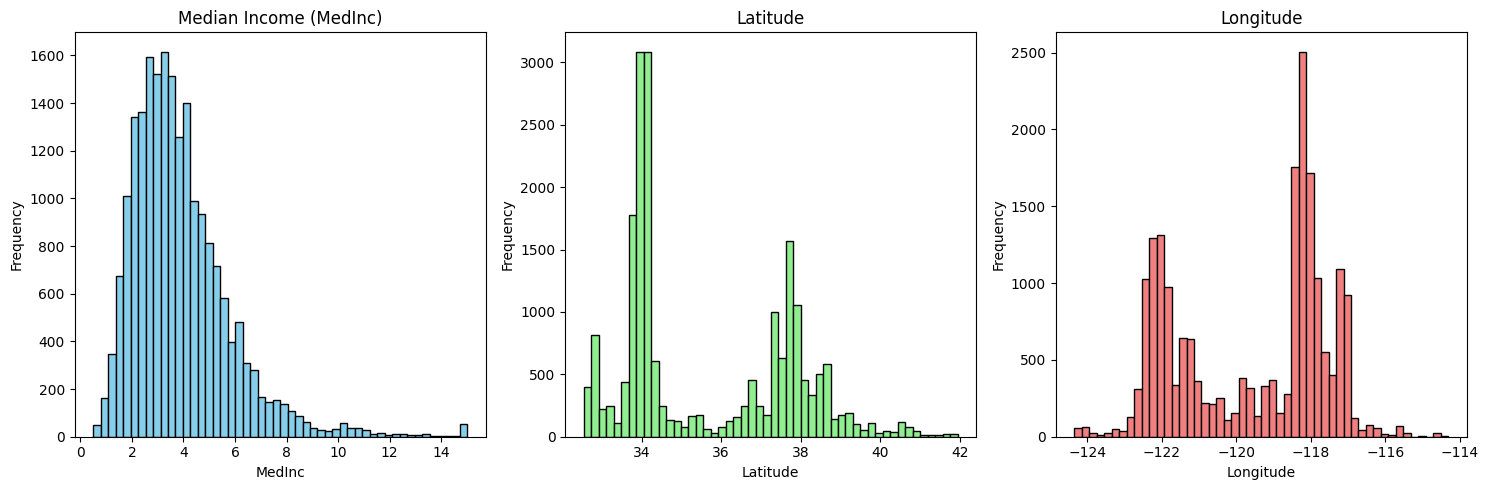

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
raw_data_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

# Select relevant columns
data_df = raw_data_df[['MedInc', 'Latitude', 'Longitude']]

# Plot histograms
plt.figure(figsize=(15, 5))

# Histogram for Median Income (MedInc)
plt.subplot(1, 3, 1)
plt.hist(data_df['MedInc'], bins=50, color='skyblue', edgecolor='black')
plt.title('Median Income (MedInc)')
plt.xlabel('MedInc')
plt.ylabel('Frequency')

# Histogram for Latitude
plt.subplot(1, 3, 2)
plt.hist(data_df['Latitude'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Latitude')
plt.xlabel('Latitude')
plt.ylabel('Frequency')

# Histogram for Longitude
plt.subplot(1, 3, 3)
plt.hist(data_df['Longitude'], bins=50, color='lightcoral', edgecolor='black')
plt.title('Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()


Feature Scaling

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(training_data)

scaled_training_data=scaler.transform(training_data)
scaled_training_data=pd.DataFrame(scaled_training_data, columns=training_data.columns)

scaled_testing_data=scaler.transform(testing_data)
scaled_testing_data=pd.DataFrame(scaled_testing_data, columns=testing_data.columns)

# Display the first few rows of the scaled data
print("Scaled Trainng Data:")
print(scaled_training_data.head())

print("Scaled Testing Data:")
print(scaled_testing_data.head())


Scaled Trainng Data:
     MedInc  Latitude  Longitude
0  0.190322  0.017021   0.729084
1  0.228452  0.129787   0.616534
2  0.252162  0.224468   0.385458
3  0.099488  0.014894   0.721116
4  0.210638  0.450000   0.453187
Scaled Testing Data:
     MedInc  Latitude  Longitude
0  0.081468  0.373404   0.531873
1  0.140095  0.275532   0.487052
2  0.205528  0.558511   0.190239
3  0.361216  0.184043   0.560757
4  0.222418  0.432979   0.241036


Clusters

In [15]:
kmeans_model=KMeans(n_clusters=6, n_init='auto', random_state=42)
kemans_fit_result=kmeans_model.fit(scaled_training_data)


labels=list(kmeans_model.labels_)
scaled_training_data['cluster']=labels
scaled_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     16512 non-null  float64
 1   Latitude   16512 non-null  float64
 2   Longitude  16512 non-null  float64
 3   cluster    16512 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 451.6 KB


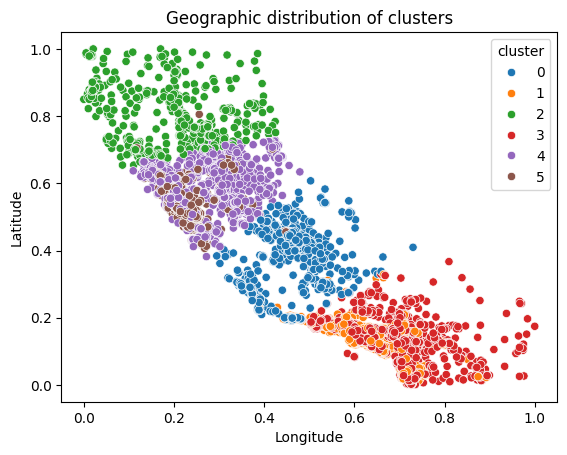

In [16]:
plt.title('Geographic distribution of clusters')
sns.scatterplot(data=scaled_training_data, x='Longitude', y='Latitude', hue='cluster', palette='tab10')
plt.show()


## Supervised Classification Model

In [17]:
labels=scaled_training_data['cluster'].reset_index(drop=True)
features=scaled_training_data.drop('cluster', axis=1).reset_index(drop=True)
features.head()

,MedInc,Latitude,Longitude
0,0.190322,0.017021,0.729084
1,0.228452,0.129787,0.616534
2,0.252162,0.224468,0.385458
3,0.099488,0.014894,0.721116
4,0.210638,0.450000,0.453187


## Model Training

In [19]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

classification_model=GradientBoostingClassifier(random_state=42)
fit_result=classification_model.fit(features, labels)

scores=cross_val_score(classification_model, features, labels)

# Calculate the mean and standard deviation of the score
mean_score = np.mean(scores) 
std_dev = np.std(scores)

# Print Cross Val Accuracy
print(f'Cross-Validation accuracy: {mean_score * 100: .2f} +/- {std_dev *100: .2f}%')






Cross-Validation accuracy:  99.42 +/-  0.18%


### Model Evaluation

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

classification_model=GradientBoostingClassifier
testing_predictions=classification_model.predict(scaled_testing_data)
testing_labels=list(kmeans_model.predict(scaled_testing_data))
result=accuracy_score(testing_labels, testing_predictions)

print(f'Supervised model is {result*100:.1f}% accurate on the held-out test data.')


TypeError: GradientBoostingClassifier.predict() missing 1 required positional argument: 'X'

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score
# import matplotlib.pyplot as plt

# # Load the data
# raw_data_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
# data_df = raw_data_df[['MedInc', 'Latitude', 'Longitude']]

# # Create train-test split (80% train, 20% test)
# X_train, X_test = train_test_split(data_df, test_size=0.20, random_state=42)

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the training and testing data
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# # Determine the optimal number of clusters using the elbow method
# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_X_train)
#     sse.append(kmeans.inertia_)

# # Choose the optimal number of clusters (e.g., 4 based on elbow plot)
# optimal_k = 4

# # Apply K-means with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# train_clusters = kmeans.fit_predict(scaled_X_train)
# test_clusters = kmeans.predict(scaled_X_test)

# # Add cluster labels to the training and testing dataframes
# X_train = pd.DataFrame(scaled_X_train, columns=['MedInc', 'Latitude', 'Longitude'])
# X_test = pd.DataFrame(scaled_X_test, columns=['MedInc', 'Latitude', 'Longitude'])
# X_train['Cluster'] = train_clusters
# X_test['Cluster'] = test_clusters

# # Separate features and labels for supervised learning
# train_features = X_train[['MedInc', 'Latitude', 'Longitude']]
# train_labels = X_train['Cluster']
# test_features = X_test[['MedInc', 'Latitude', 'Longitude']]
# test_labels = X_test['Cluster']

# # Train the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Perform cross-validation
# cv_scores = cross_val_score(rf_classifier, train_features, train_labels, cv=5)
# print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f}')

# # Fit the model on the entire training set
# rf_classifier.fit(train_features, train_labels)

# # Make predictions on the test set
# predictions = rf_classifier.predict(test_features)

# # Evaluate the model
# accuracy = accuracy_score(test_labels, predictions)
# print(f'Test Accuracy: {accuracy:.4f}')
# print('\nClassification Report:')
# print(classification_report(test_labels, predictions))


Cross-Validation Accuracy: 0.9972
Test Accuracy: 0.9969

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1262
           1       1.00      1.00      1.00       620
           2       1.00      0.98      0.99       440
           3       1.00      1.00      1.00      1806

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



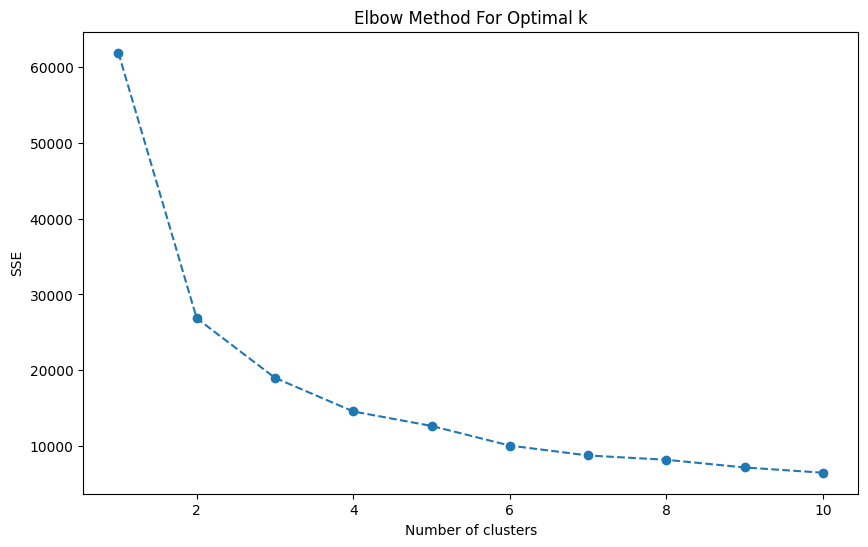

/tmp/ipykernel_728/2099042764.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Cluster'] = cluster_labels


Cross-Validation Accuracy: 0.9973
Test Accuracy: 0.9988

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1825
           1       1.00      1.00      1.00       453
           2       1.00      1.00      1.00      1251
           3       1.00      1.00      1.00       599

    accuracy                           1.00      4128
   macro avg       1.00      1.00      1.00      4128
weighted avg       1.00      1.00      1.00      4128



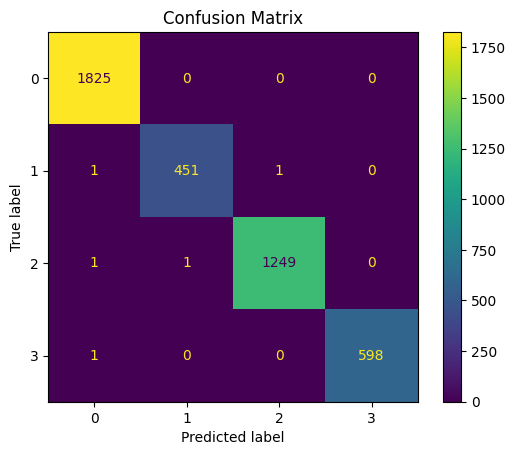

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Load the data
# raw_data_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
# data_df = raw_data_df[['MedInc', 'Latitude', 'Longitude']]

# # Initialize the scaler
# scaler = StandardScaler()

# # Fit and transform the entire dataset
# scaled_data = scaler.fit_transform(data_df)

# # Determine the optimal number of clusters using the elbow method
# sse = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_data)
#     sse.append(kmeans.inertia_)

# # Plot the elbow graph
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, 11), sse, marker='o', linestyle='--')
# plt.xlabel('Number of clusters')
# plt.ylabel('SSE')
# plt.title('Elbow Method For Optimal k')
# plt.show()

# # Choose the optimal number of clusters (e.g., 4 based on elbow plot)
# optimal_k = 4

# # Apply K-means with the optimal number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# cluster_labels = kmeans.fit_predict(scaled_data)

# # Add cluster labels to the dataframe
# data_df['Cluster'] = cluster_labels

# # Create train-test split (80% train, 20% test)
# train_data, test_data = train_test_split(data_df, test_size=0.20, random_state=42)

# # Separate features and labels for supervised learning
# train_features = train_data[['MedInc', 'Latitude', 'Longitude']]
# train_labels = train_data['Cluster']
# test_features = test_data[['MedInc', 'Latitude', 'Longitude']]
# test_labels = test_data['Cluster']

# # Train the Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42)

# # Perform cross-validation
# cv_scores = cross_val_score(rf_classifier, train_features, train_labels, cv=5)
# print(f'Cross-Validation Accuracy: {cv_scores.mean():.4f}')

# # Fit the model on the entire training set
# rf_classifier.fit(train_features, train_labels)

# # Make predictions on the test set
# predictions = rf_classifier.predict(test_features)

# # Evaluate the model
# accuracy = accuracy_score(test_labels, predictions)
# print(f'Test Accuracy: {accuracy:.4f}')
# print('\nClassification Report:')
# print(classification_report(test_labels, predictions))

# # Confusion Matrix
# cm = confusion_matrix(test_labels, predictions)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
# disp.plot(cmap='viridis')
# plt.title('Confusion Matrix')
# plt.show()

